In [1]:
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import utils
import os
import pandas as pd
%matplotlib inline

In [2]:
AUDIO_DIR = '/media/ravi/507412DD7412C59E/fma_small/'

# Load metadata and features.
tracks = utils.load('/home/ravi/metafma/fma_metadata/tracks.csv')
genres = utils.load('/home/ravi/metafma/fma_metadata/genres.csv')
features = utils.load('/home/ravi/metafma/fma_metadata/features.csv')
echonest = utils.load('/home/ravi/metafma/fma_metadata/echonest.csv')

tracks.csv


/home/ravi/Amadeus/fma_code/utils.py:216: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


genres.csv
features.csv
echonest.csv


In [83]:
filename = utils.get_audio_path(AUDIO_DIR, 2012)
print('File: {}'.format(filename))

x = utils.FfmpegLoader(sampling_rate=44100).load(filename)
sr=44100 # sampling rate

File: /media/ravi/507412DD7412C59E/fma_small/002/002012.mp3


In [84]:
x

array([    0,     0,     0, ..., 14595, 10536, 12026], dtype=int16)

In [85]:
x.shape

(1321967,)

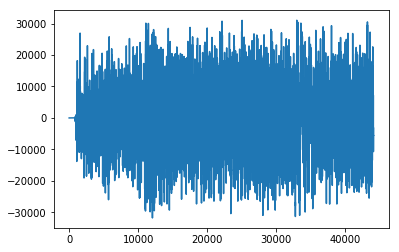

In [87]:
plt.plot(x[0:44100])

In [33]:
start, end = 1, 30
ipd.Audio(data=x[start*sr:end*sr], rate=sr)

In [38]:
def id_from_genre_text(genre_text,genres,top_level=True):
    if top_level:
        return genres.loc[genres['title']==genre_text].iloc[0]["top_level"]
    return genres.index[genres['title']==genre_text].tolist()[0]

def get_genre_id(track_id,tracks,genres):
    track_genre_title = tracks[('track','genre_top')].iloc[track_id]
    if track_genre_title is str:
        return id_from_genre_text(track_genre_title,genres)
    else:
        return tracks[('track','genres')].iloc[track_id][0]

In [39]:
small = tracks['set', 'subset'] <= 'small'


In [40]:
small.shape

(106574,)

In [41]:
small = tracks['set', 'subset'] <= 'small'

train = tracks['set', 'split'] == 'training'
val = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

y_train = tracks.loc[small & train, ('track', 'genre_top')].apply(id_from_genre_text,args=(genres,))
y_test = tracks.loc[small & test, ('track', 'genre_top')].apply(id_from_genre_text,args=(genres,))

X_train = 
X_test = features.loc[small & test, 'mfcc']

print('{} training examples, {} testing examples'.format(y_train.size, y_test.size))
print('{} features, {} classes'.format(X_train.shape[1], np.unique(y_train).size))

SyntaxError: invalid syntax (<ipython-input-41-55fd7b379785>, line 10)

In [74]:
train

NameError: name 'train' is not defined

In [42]:
out_ad = '/media/ravi/507412DD7412C59E/fma_small_csvs/'

In [33]:
if not os.path.exists(out_ad):
    os.makedirs(out_ad)

In [80]:
def make_csvs(track_id_prefix,out_dir,genres_df,tracks_df):
    out_file_path = out_dir+"/{}.csv".format(track_id_prefix)
    raw_songs = dict()
    genres = dict()
    song_directory = os.fsencode(AUDIO_DIR+"{:03d}".format(track_id_prefix))
    out_str = "track_id,genre_id,raw_song\n"
    for file in os.listdir(song_directory):
        filename = AUDIO_DIR+"{:03d}/".format(track_id_prefix)+ os.fsdecode(file)
        if filename.endswith(".mp3"):
            track_id = int(os.fsdecode(file)[:-4])
            raw_songs[track_id] = utils.FfmpegLoader().load(filename)
            print(track_id)
            genres[track_id] = get_genre_id(track_id,tracks_df,genres_df)
            song_str = ""
            for i in raw_songs[track_id]:
                song_str+="{},".format(i)
            out_str += "{},{},{}\n".format(track_id,genres[track_id],song_str)
    df = pd.DataFrame().from_dict({"genres":genres,"raw_songs":raw_songs})
    with open(out_file_path,'w') as outfile:
        outfile.write(out_str)
    
    
    return df

In [81]:
a = make_csvs(2,out_ad,genres,tracks)

2012
2096
2097
2099


In [79]:
type(x)

numpy.ndarray

In [55]:
a

,genres,raw_songs
2012,17,0 0 1 0 2 ...
2096,12,0 0 1 0 2 ...
2097,12,0 0 1 0 2 ...
2099,12,0 0 1 0 2 ...


In [73]:
a.iloc[0]

genres                                                      17
raw_songs    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 2012, dtype: object

In [ ]:
a.to_csv()